# Example for PedigreeVisualization
Repository: https://github.com/joanmanbar/PedigreeVisualization \
Created by Joan Barreto \
email: jbarreto@umn.edu

# 1. Imports/Settings

In [1]:
# !git clone https://github.com/joanmanbar/PedigreeVisualization.git

In [2]:
import sys
sys.path.insert(0,'/content/PedigreeVisualization')
sys.path.append('/content/PedigreeVisualization')

In [3]:
from PedigreeVisualization import *
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import collections
from collections import Counter
import seaborn as sns

In [4]:
# Make sure Jupyter Notebook shows all outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set max number of rows to visualize
pd.set_option('display.max_rows', 10)

# plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

In [5]:
# List of 100 custom parent names
P100 = [ "P0" + str(int(s)+1) for s in range(9)]
P100 = P100 + [ "P" + str(int(s)+1) for s in range(9,99)]
# P100

# 2. (OPTIONAL) Load file `P` with pedigree data

In [6]:
url = 'https://raw.githubusercontent.com/joanmanbar/PedigreeVisualization/main/Pedigree599_UTF.csv'
Pedigree_data = pd.read_csv(url, encoding = 'utf_8')
# Subset variables of interest
P = Pedigree_data.loc[:,['GID','Pedigree','Specific Name']]
# Fill None with nan
P = P.fillna(value=np.nan)
P = P.dropna().reset_index(drop=True)
P

,GID,Pedigree,Specific Name
0,775,PENJAMO T 62/GABO 55,SIETE CERROS T66
1,2167,AGATHA/3*YECORA F 70,OASIS F 86
2,2465,VICAM S 71//CIANO F 67/SIETE CERROS T66/3/KALY...,PAVON F 76
3,3881,TEZANOS PINTOS PRECOZ/PALOMA//SIETE CERROS T66,NACOZARI F 76
4,3895,KAVKAZ/BUHO//KALYANSONA/BLUEBIRD,SERI M 82
...,...,...,...
57,422381,HOPPS/ROBIN-M//KALYANSONA,HUASTECO M 81
58,447647,BOBWHITE/NACOZARI F 76//VEERY/3/BLUEJAY/COCORA...,BAVIACORA M 92
59,835884,ALUBUC/BUCKBUCK//PARULA/VEERY #6,TOROCAHUI S2004
60,2430154,NORD DEPREZ/VG9144//KALYANSONA/BLUEBIRD/3/YACO...,PBW343


# 3. Select and visualize pedigree of interest

**Option 1: Entering a pedigree:** \
Add a pedigree in quotation marks to the variable `pedigree = ` and run the cell. \
Example 1:
`pedigree = 'A/*2B//C'` \
Example 2:
`pedigree = 'D/3/C//A/*2B/4/C/'`


or

**Option 2: Selecting a pedigree from the sample file `P` :** \
Choose a number between 0 and 599 and add it in square backets after the variable `pedigree = P[Pedigree]`. \
You can find the complete file in this link: https://github.com/joanmanbar/PedigreeVisualization/blob/main/Pedigree599_UTF.csv
Example 1:
`pedigree = P['Pedigree'][599]` \
Example 2:
`pedigree = P['Pedigree'][9]`

VICAM S 71//CIANO F 67/SIETE CERROS T66/3/KALYANSONA/BLUEBIRD


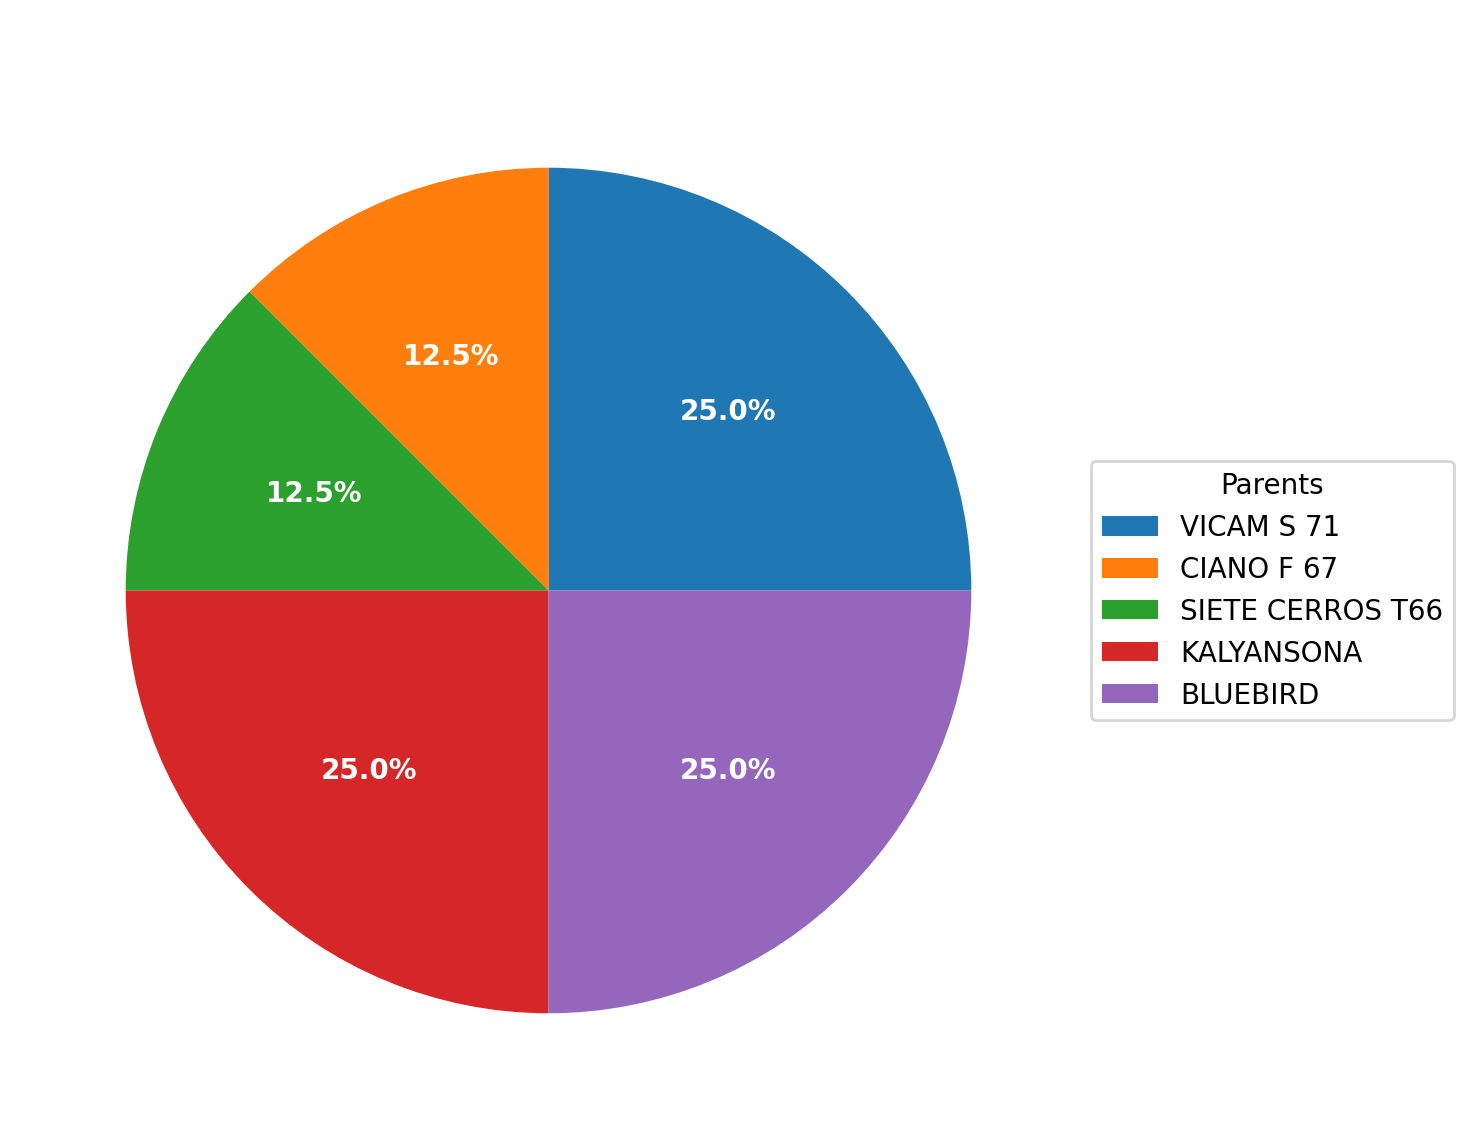

In [7]:
# Add a value in between quotation marks
# pedigree = 'A/B/2/C/3/D/4/E/F/2/G/H'
# pedigree = 'A/B/2/C/D'
# pedigree='BUCKY/MAYA 74/4/BLUEBIRD//HYBRID DELHI 832/OLESON´S DWARF/3/CIANO F 67/PENJAMO T 62'
pedigree = P['Pedigree'][2]
DD = AnCon(pedigree, R=1, SimplifyPed=False)
PedigreeVis(DD, Log=False)

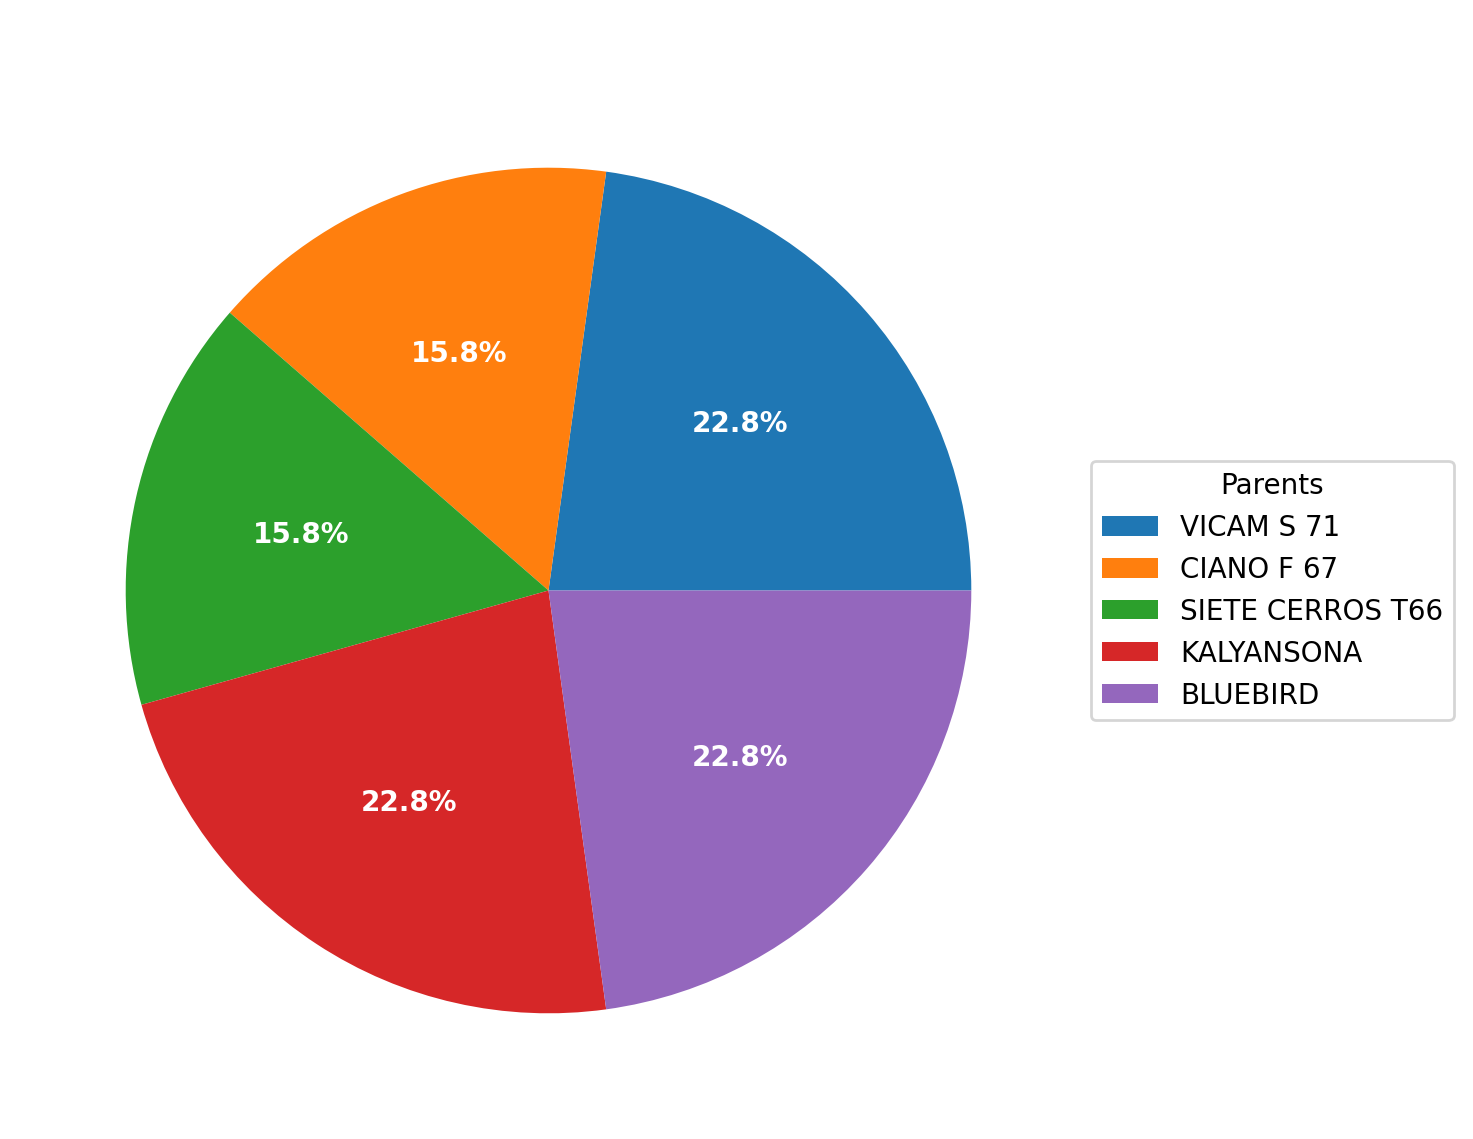

In [8]:
PedigreeVis(DD, Log=True)

# 4. Ancestral Contribution For Entire Dataset

In [9]:
%%time
df1 = df_AnCon(df=P)
df1

CPU times: total: 125 ms
Wall time: 106 ms


,AGATHA,ALUBUC,ANAHUAC F 75,ANDES,AUSII61.157,B4946.A.4.18.2.1Y,BLUEBIRD,BLUEJAY,BOBWHITE,BONANZA,...,VEERY #6,VG9144,VICAM S 71,VULTURE,WEAVER,YACO,YAKTANA 54,YAQUI 50,YAQUI 53,YECORA F 70
775,0.000,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.000,0.0,...,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000
2167,0.125,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.000,0.0,...,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.875
2465,0.000,0.00,0.0,0.0,0.0,0.0,0.2500,0.00,0.000,0.0,...,0.00,0.0000,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.000
3881,0.000,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.000,0.0,...,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000
3895,0.000,0.00,0.0,0.0,0.0,0.0,0.2500,0.00,0.000,0.0,...,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422381,0.000,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.000,0.0,...,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000
447647,0.000,0.00,0.0,0.0,0.0,0.0,0.0000,0.25,0.125,0.0,...,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000
835884,0.000,0.25,0.0,0.0,0.0,0.0,0.0000,0.00,0.000,0.0,...,0.25,0.0000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000
2430154,0.000,0.00,0.0,0.0,0.0,0.0,0.0625,0.00,0.000,0.0,...,0.00,0.0625,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.000


## Verify that sum of contributions is exactly 1

In [10]:
df2 = df1.copy()
df2['SUM'] = df2.sum(axis=1)
df2.loc[df2['SUM'] != 1]

,AGATHA,ALUBUC,ANAHUAC F 75,ANDES,AUSII61.157,B4946.A.4.18.2.1Y,BLUEBIRD,BLUEJAY,BOBWHITE,BONANZA,...,VG9144,VICAM S 71,VULTURE,WEAVER,YACO,YAKTANA 54,YAQUI 50,YAQUI 53,YECORA F 70,SUM


# 5. Visualize Ancestral Contribution For Entire Dataset

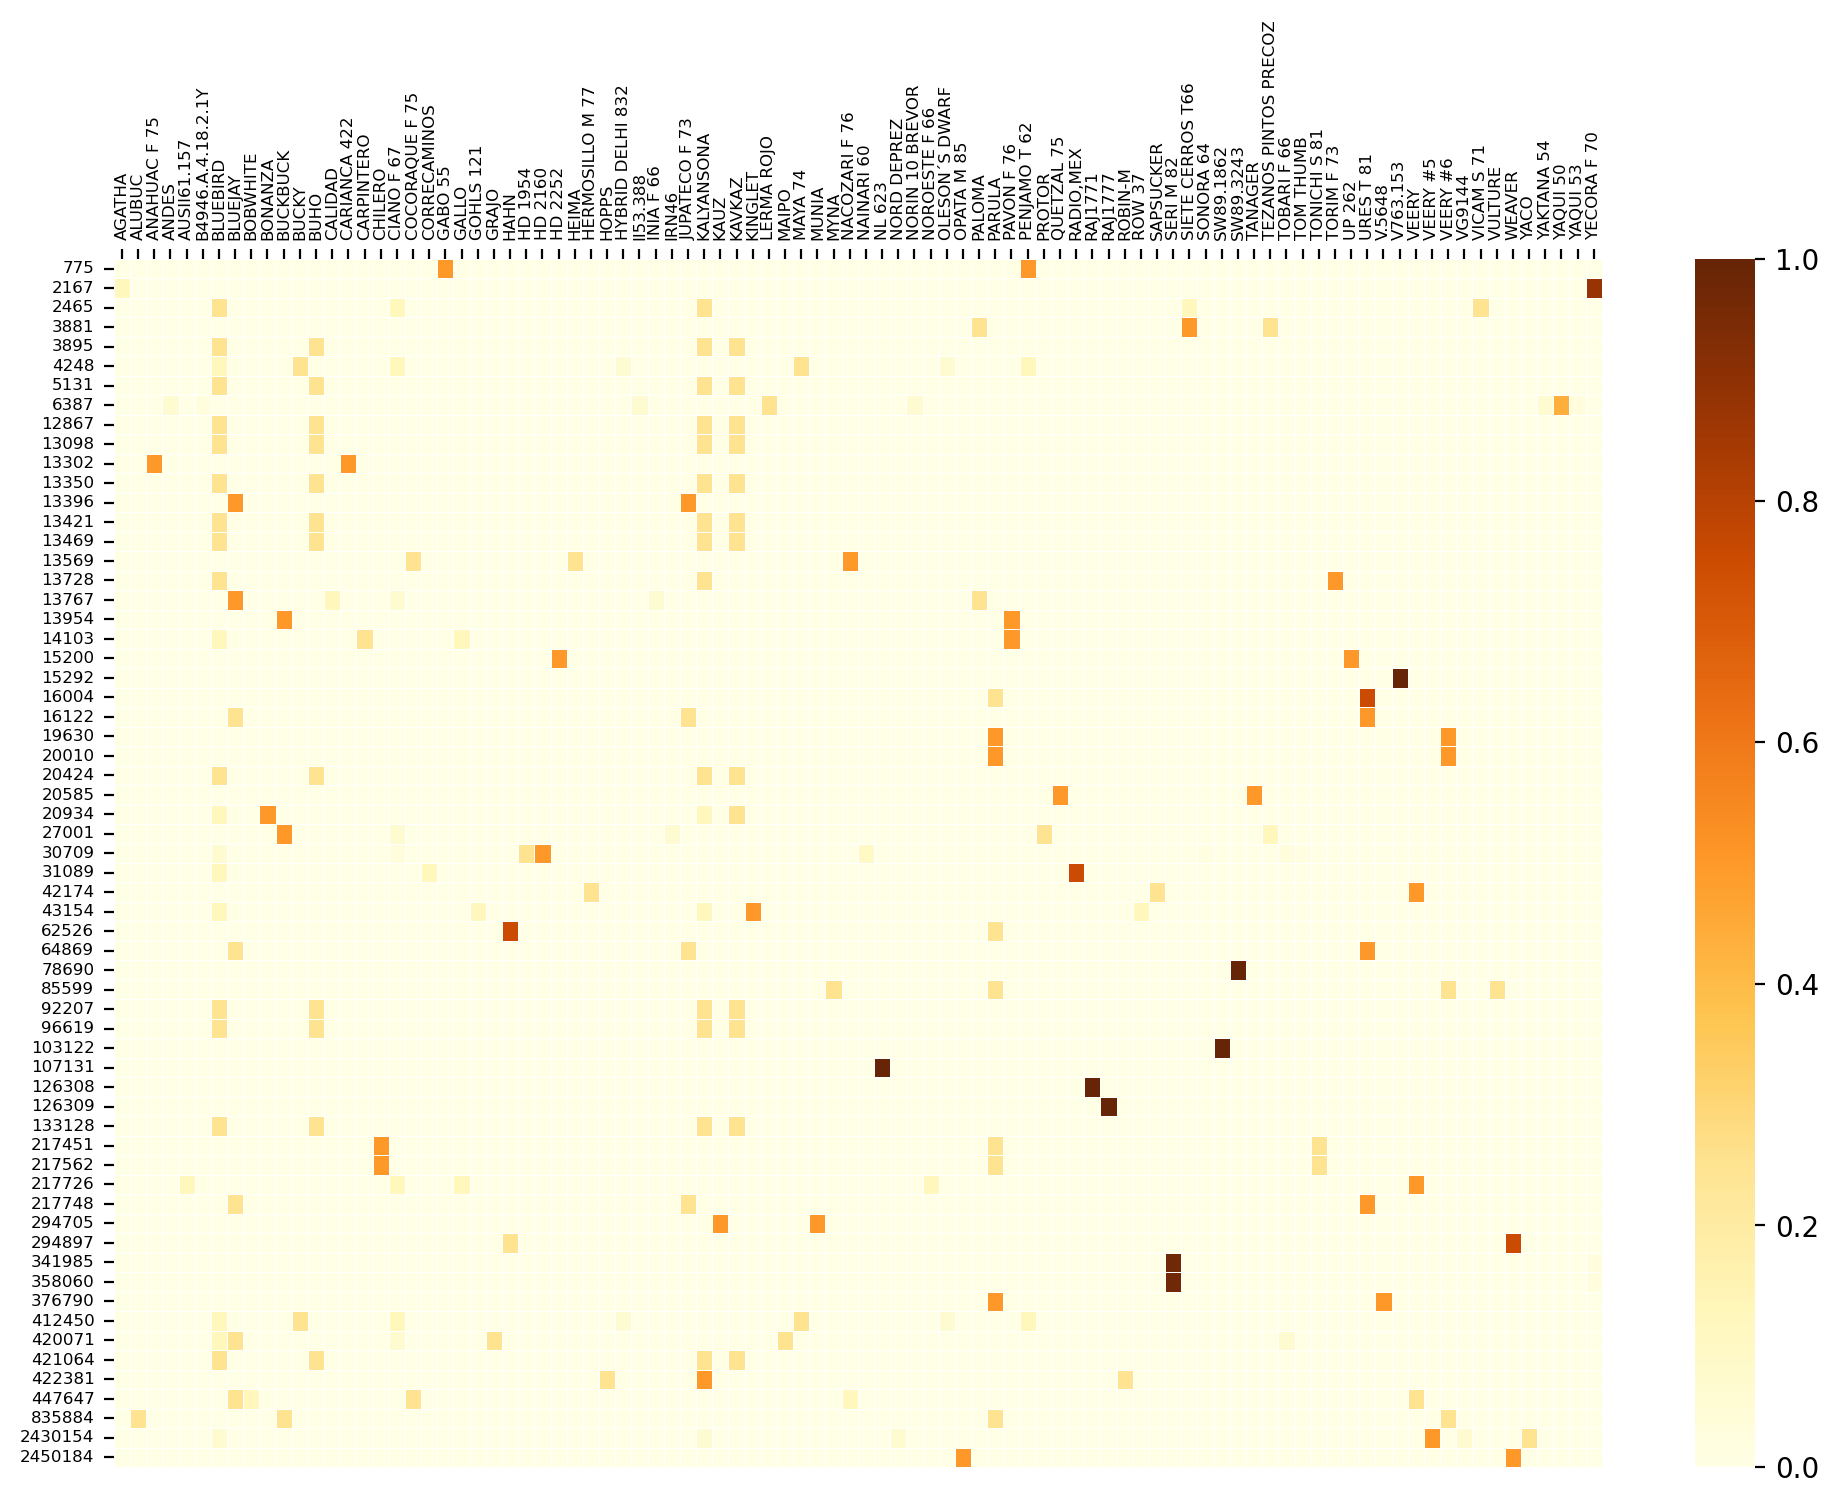

CPU times: total: 2.94 s
Wall time: 2.94 s


In [11]:
%%time
PlotRelationship(df1, Cov=False, PlotSize=(12,8), LW=0.2, LabSize=6)

# 6. Visualize Relatedness Among GID (P Matrix)

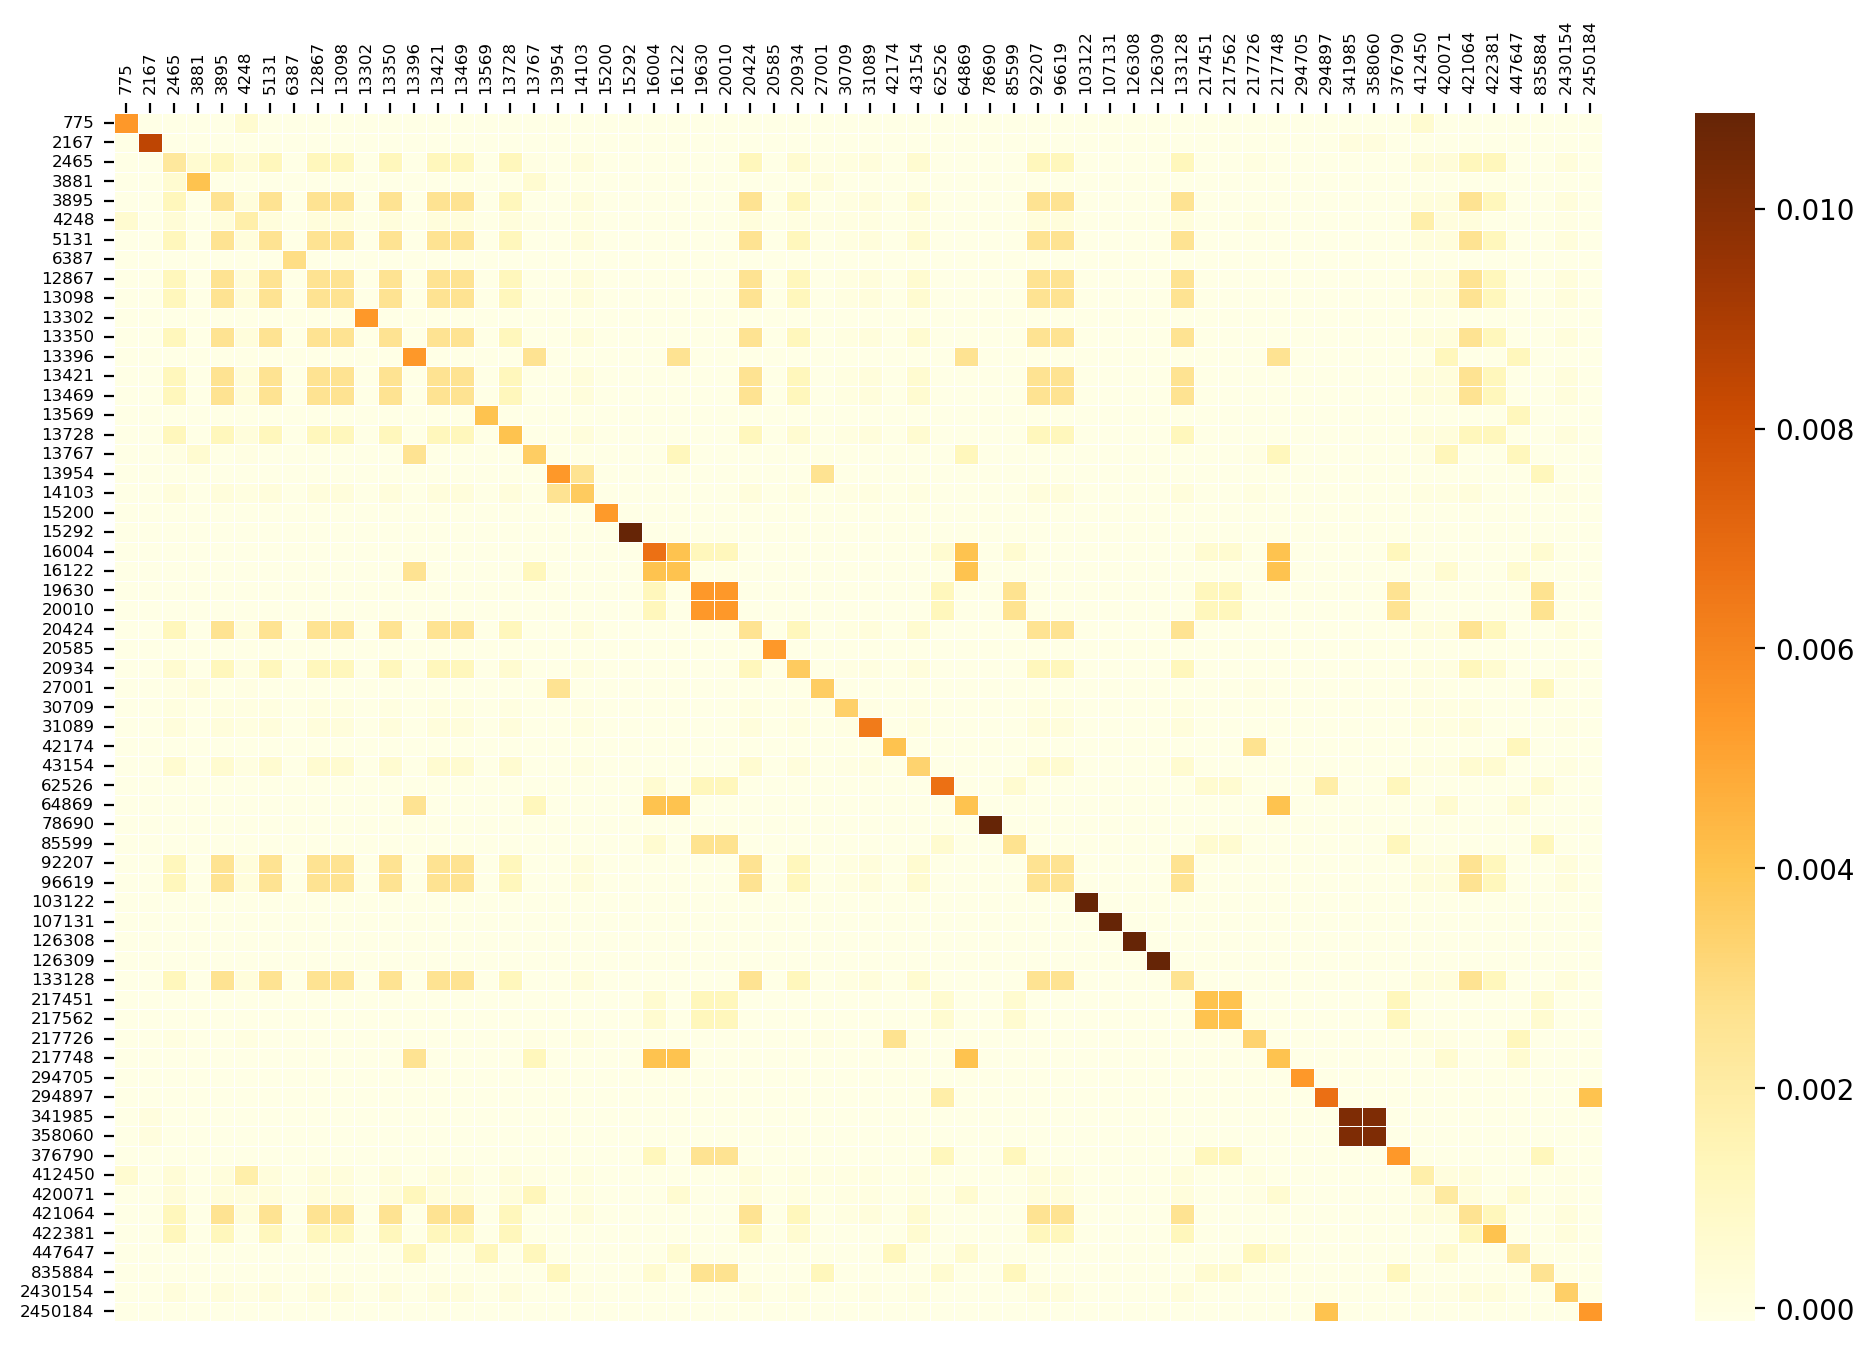

CPU times: total: 3.08 s
Wall time: 2.06 s


In [12]:
%%time
PlotRelationship(df1, Cov=True, PlotSize=(12,8), LW=0.2, LabSize=6)